In [1]:
# Author:Renaldo Sauveur
# Date:16/06/2024
# Sript to read and modify gravi file (format TSF)
# From the input file we create 2 new files (gravi_ and param_)
# File gravi_ content gravi measurement with 0.1 second step time
# File param_ content parameters information (tilt,temparature,tide correction,status)

# importing modules
import pandas as pd
import os
from datetime import datetime
import shutil
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


## List of input file
#list = os.listdir(os.getcwd()+"/Input")
list = os.listdir('/kaggle/input/gravifile/Input')
## Columns name definition
name = ['year', 'month', 'day', 'hour', 'minute', 'second','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','X','Y','Temp','Tide correction','Status']

## Loop over input file
for k in range(len(list)):    
    #read list of input file
    df = pd.read_csv('/kaggle/input/gravifile/Input/'+list[k], skiprows = 42, sep=None, engine="python", names=name, header=None )
        
    #Date columns plus 10 first columns from TSF file
    gravileft = df[['year', 'month', 'day', 'hour', 'minute', 'second','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9']]
    
    #Date columns plus 5 last columns from TSF file
    graviright = df[['year', 'month', 'day', 'hour', 'minute', 'second','X','Y','Temp','Tide correction','Status']]
    
    ## DataFrame df_datetime creation with datetimes columns only
    #Variables initialization 
    ye = []
    mo = []
    da = []
    ho = []
    mi = []
    se = []    
    #Loop to create datetimes columns in order to consider 0.1 second step time
    for index, row in gravileft.iterrows():    
        x = [row['year'], row['month'], row['day'], row['hour'], row['minute'], row['second']]
       
        for i in range(10): # 10 is the number of fraction of second
            ye.append(row['year'])
            mo.append(row['month'])
            da.append(row['day'])
            ho.append(row['hour'])
            mi.append(row['minute'])
            se.append(row['second'])         
   
    
    df_datetime = pd.DataFrame((zip(ye, mo, da, ho, mi, se)), columns = ['A','B','C','D','E','F'])
        
    ### DataFrame df_gravi creation where column valueG is 0.1 second step time    
    #Fraction of second list
    Fracs = ['000', '100', '200', '300', '400', '500', '600', '700', '800', '900']
        
    #Loop to create list of fraction of second
    ListFracs = []     # list initialization
    for j in range(df.shape[0]):
        for i in range(len(Fracs)):
            ListFracs.append(Fracs[i])

    columnG = ['G0','G1','G2','G3','G4','G5','G6','G7','G8','G9']
    valueG = []
    #for index, row in gravileft.iterrows(): 
    for index, row in gravileft.iterrows():  
        for i in range(len(columnG)):        
            valueG.append(row[columnG[i]])             
 
    
    df_gravi = pd.DataFrame(zip(ListFracs, valueG), columns = ['G','H'])
        

    ## Join dataframe df_datetime and df_gravi
    join_DF = df_datetime.join(df_gravi)    
        
    ## Writting  data frame to text file  
    join_DF.to_csv("gravi_"+list[k], index=False, sep='\t', header=False)
    
    graviright.to_csv("param_"+list[k], index=False, sep='\t', header=False)
    
    
    ### Writting header in text file
    
    ## Header for gravi_ file
    line = ["[TSF-file] v01.0","[UNDETVAL]","-999999.000","[TIMEFORMAT]","DATETIMEFRAC","[INCREMENT]","0.10000","[CHANNELS]",
       "PORT-AU-PRINCE:SCINTREX CG6-270:Gravity","[UNITS]","ADU","[COMMENT]","[COUNTINFO]","864001","[DATA]"]

    with open("gravi_"+list[k], 'r+') as file: #Open the file in read mode
        file_data = file.read()
        ##Seek to  particular position.
        ##First argument indicates the reference position.  
        ##0 - beginning, 1-current, 2-end 
        file.seek(0,0)
        for i in range(len(line)):        
            file.write(line[i] + '\n') 
            file.seek(0,1)
        file.seek(0,1) 
        file.write(file_data)
        
        
    ## Header for param_ file
    line = ["[TSF-file] v01.0","[UNDETVAL]","-999999.000","[TIMEFORMAT]","DATETIME","[INCREMENT]","1","[CHANNELS]",
       "PORT-AU-PRINCE:SCINTREX CG6-270:TILT X","PORT-AU-PRINCE:SCINTREX CG6-270:TILT Y","PORT-AU-PRINCE:SCINTREX CG6-270:Meter Temp",
        "PORT-AU-PRINCE:SCINTREX CG6-270:Tide Correction","PORT-AU-PRINCE:SCINTREX CG6-270:Status",
        "[UNITS]","ADU","ADU","ADU","mGals","Byte","[COMMENT]","[COUNTINFO]","864001","[DATA]"]

    with open("param_"+list[k], 'r+') as file: 
        file_data = file.read()  
        file.seek(0,0)
        for i in range(len(line)):        
            file.write(line[i] + '\n') 
            file.seek(0,1)
        file.seek(0,1) 
        file.write(file_data)
  

   
    

In [2]:
# Creation of Param and Gravi directories
Path('/kaggle/working/Param').mkdir(parents=True, exist_ok=True)
Path('/kaggle/working/Gravi').mkdir(parents=True, exist_ok=True)

In [3]:
# Move param_ and gravi_  files to their respective folder
files = glob.glob('/kaggle/working/Param/*')
for f in files:
    os.remove(f)
    
param_file = glob.glob(os.getcwd()+"/param_*")
[shutil.move(param_file[i], os.getcwd()+"/Param/") for i in range(len(param_file))]
    
files = glob.glob('/kaggle/working/Gravi/*')
for f in files:
    os.remove(f)
    
gravi_file = glob.glob(os.getcwd()+"/gravi_*")    
[shutil.move(gravi_file[i], os.getcwd()+"/Gravi/")  for i in range(len(gravi_file))]  

['/kaggle/working/Gravi/gravi_0270_20240302.tsf',
 '/kaggle/working/Gravi/gravi_0270_20240301.tsf',
 '/kaggle/working/Gravi/gravi_0270_20240229.tsf']

**All below is added just to help for a better visualization and understanding of input and output**

In [4]:
# list of file in the input folder
os.listdir('/kaggle/input/gravifile/Input')

['0270_20240229.tsf', '0270_20240302.tsf', '0270_20240301.tsf']

In [5]:
# list of file in the Gravi folder
os.listdir(os.getcwd()+'/Gravi')

['gravi_0270_20240302.tsf',
 'gravi_0270_20240301.tsf',
 'gravi_0270_20240229.tsf']

In [6]:
# list of file in the Param folder
os.listdir(os.getcwd()+'/Param')

['param_0270_20240301.tsf',
 'param_0270_20240229.tsf',
 'param_0270_20240302.tsf']

In [7]:
# Example of input dataframe (columns G0 to G9 are measurement with 0.1 second step)
df.head()

,year,month,day,hour,minute,second,G0,G1,G2,G3,...,G5,G6,G7,G8,G9,X,Y,Temp,Tide correction,Status
0,2024,3,1,0,0,0,-2787378,-2787391,-2787411,-2787435,...,-2787444,-2787414,-2787350,-2787252,-2787148,-227468,-201178,-6107,0.000430,0
1,2024,3,1,0,0,1,-2787068,-2787029,-2787037,-2787096,...,-2787296,-2787389,-2787462,-2787511,-2787524,-227478,-201214,-6121,0.000422,0
2,2024,3,1,0,0,2,-2787499,-2787442,-2787367,-2787292,...,-2787226,-2787225,-2787205,-2787153,-2787088,-227461,-201260,-6056,0.000414,0
3,2024,3,1,0,0,3,-2787041,-2787029,-2787055,-2787105,...,-2787214,-2787254,-2787290,-2787339,-2787402,-227430,-201159,-6063,0.000406,0
4,2024,3,1,0,0,4,-2787457,-2787477,-2787468,-2787458,...,-2787451,-2787421,-2787382,-2787359,-2787355,-227454,-201110,-6132,0.000399,0


In [8]:
# Example of gravileft dataframe
gravileft.head()

,year,month,day,hour,minute,second,G0,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,2024,3,1,0,0,0,-2787378,-2787391,-2787411,-2787435,-2787449,-2787444,-2787414,-2787350,-2787252,-2787148
1,2024,3,1,0,0,1,-2787068,-2787029,-2787037,-2787096,-2787192,-2787296,-2787389,-2787462,-2787511,-2787524
2,2024,3,1,0,0,2,-2787499,-2787442,-2787367,-2787292,-2787241,-2787226,-2787225,-2787205,-2787153,-2787088
3,2024,3,1,0,0,3,-2787041,-2787029,-2787055,-2787105,-2787162,-2787214,-2787254,-2787290,-2787339,-2787402
4,2024,3,1,0,0,4,-2787457,-2787477,-2787468,-2787458,-2787458,-2787451,-2787421,-2787382,-2787359,-2787355


In [9]:
# Example of graviright dataframe
graviright.head()

,year,month,day,hour,minute,second,X,Y,Temp,Tide correction,Status
0,2024,3,1,0,0,0,-227468,-201178,-6107,0.000430,0
1,2024,3,1,0,0,1,-227478,-201214,-6121,0.000422,0
2,2024,3,1,0,0,2,-227461,-201260,-6056,0.000414,0
3,2024,3,1,0,0,3,-227430,-201159,-6063,0.000406,0
4,2024,3,1,0,0,4,-227454,-201110,-6132,0.000399,0


In [10]:
# Example of output dataframe (each row represents a 0.1 second step measurement)
join_DF.head(20)

,A,B,C,D,E,F,G,H
0,2024,3,1,0,0,0,000,-2787378
1,2024,3,1,0,0,0,100,-2787391
2,2024,3,1,0,0,0,200,-2787411
3,2024,3,1,0,0,0,300,-2787435
4,2024,3,1,0,0,0,400,-2787449
5,2024,3,1,0,0,0,500,-2787444
6,2024,3,1,0,0,0,600,-2787414
7,2024,3,1,0,0,0,700,-2787350
8,2024,3,1,0,0,0,800,-2787252
9,2024,3,1,0,0,0,900,-2787148


Plotting example for a daily file

In [11]:
#Fraction of second list (to take into account microsecond)
Fracsi = ['000000', '100000', '200000', '300000', '400000', '500000', '600000', '700000', '800000', '900000']
        
#Loop to create list of fraction of second
ListFracsi = []     # list initialization
for j in range(df.shape[0]):
    for i in range(len(Fracsi)):
        ListFracsi.append(Fracsi[i])

In [12]:
# Creation of date dataframe in order to consider microsecond step time
frame = pd.DataFrame({'year': ye,'month': mo, 'day': da, 'hour':ho , 'minute':mi , 'second':se , 'microsecond':ListFracsi})
framedate = pd.to_datetime(frame)

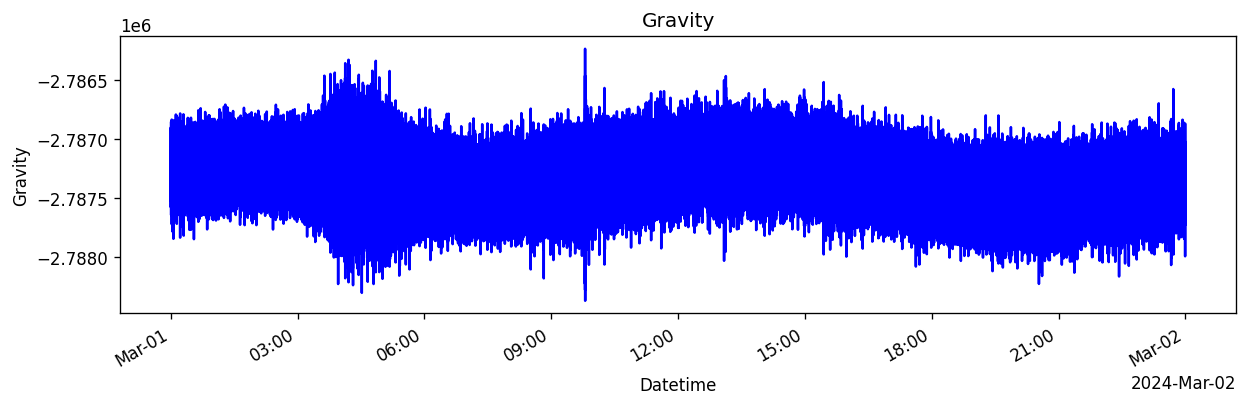

In [13]:
# plot of the last processed file

fig, axes = plt.subplots(figsize=(12,3), dpi=120)
axes.plot(np.array(framedate), valueG, 'b')
axes.set_xlabel('Datetime')
axes.set_ylabel('Gravity')
axes.set_title('Gravity');

# Rotates and right-aligns the x labels so they don't crowd each other.
axes.xaxis.set_major_formatter(mdates.ConciseDateFormatter(axes.xaxis.get_major_locator()))
for label in axes.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')


In [14]:
## save the plot 
file_name = list[k].strip(".tsf")
fig.savefig(file_name)